In [1]:
import os 
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import random

#python으로 확인할 시, 한글폰트 필요
import seaborn as sns
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')
np.random.seed(42)
random.seed(42)
import warnings
warnings.filterwarnings(action='ignore')

import sys
sys.path.append('../')

from profiler import Profiler
from model import DecisionTree
import os

In [2]:
data_path = "../data/"

cols = ['no', 'id', 'ageD', 'CLU_A', 'CLU_B', 'CLU_C1', 'CLU_C3', 'CLU_C5', 'CLU_E2', 'CLU_E4',
       'CLU_E5', 'CLU_F2', 'CLU_F3', 'CLU_G4', 'CLU_G6', 'CLU_H21', 'CLU_H22',
       'CLU_H23', 'CLU_H24', 'CLU_J', 'CLU_LB', 'CLU_LC', 'CLU_LD', 'CLU_LI',
       'CLU_LF', 'CLU_LG', 'CLU_LI2', 'CLU_LK','CLUSTER1','CLUSTER2']

survey = pd.read_excel(os.path.join(data_path,'survey_string.xlsx'))
survey = survey.drop(cols,axis=1)
survey = survey.drop('SQ4_1a',axis=1) #통신사 묻는 질문은 그냥 뺌 

survey_label = pd.read_excel(os.path.join(data_path,'survey_label.xlsx'))
survey_label = dict(zip(survey_label['no'],survey_label['데이터타입']))

with open(os.path.join(data_path, 'MAC_to_idx_final.pkl'),'rb') as fin:
    mac_to_idx = pickle.load(fin)

In [3]:
profiler = Profiler(survey, survey_label, mac_to_idx)

onehot_cols = [k for k,v in survey_label.items() if v==0]
ordinal_cols = [k for k,v in survey_label.items() if v==1]
onehot_cols = [col for col in onehot_cols if col in survey.columns]
ordinal_cols = [col for col in ordinal_cols if col in survey.columns]

survey = profiler.feature_engineering(onehot_cols, ordinal_cols)

In [4]:
k=15
embed_model = 'srgnn'
filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}
embedding = np.load(os.path.join(data_path, filename[embed_model]))

최대 score의 min_samples_leaf = 1
min_samples_leaf 12에서 target_socre 0.5을 달성하지 못하여 종료합니다.


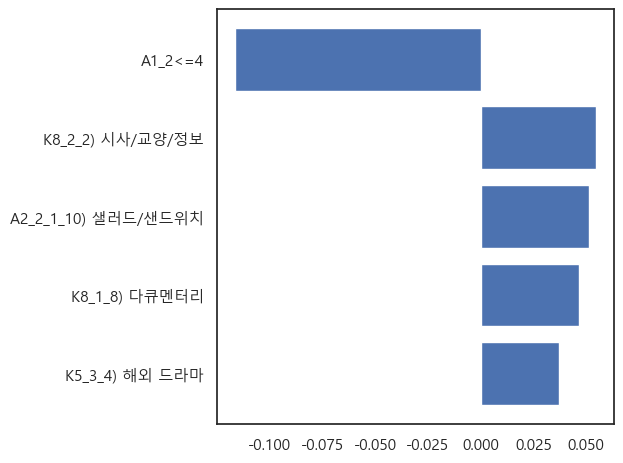

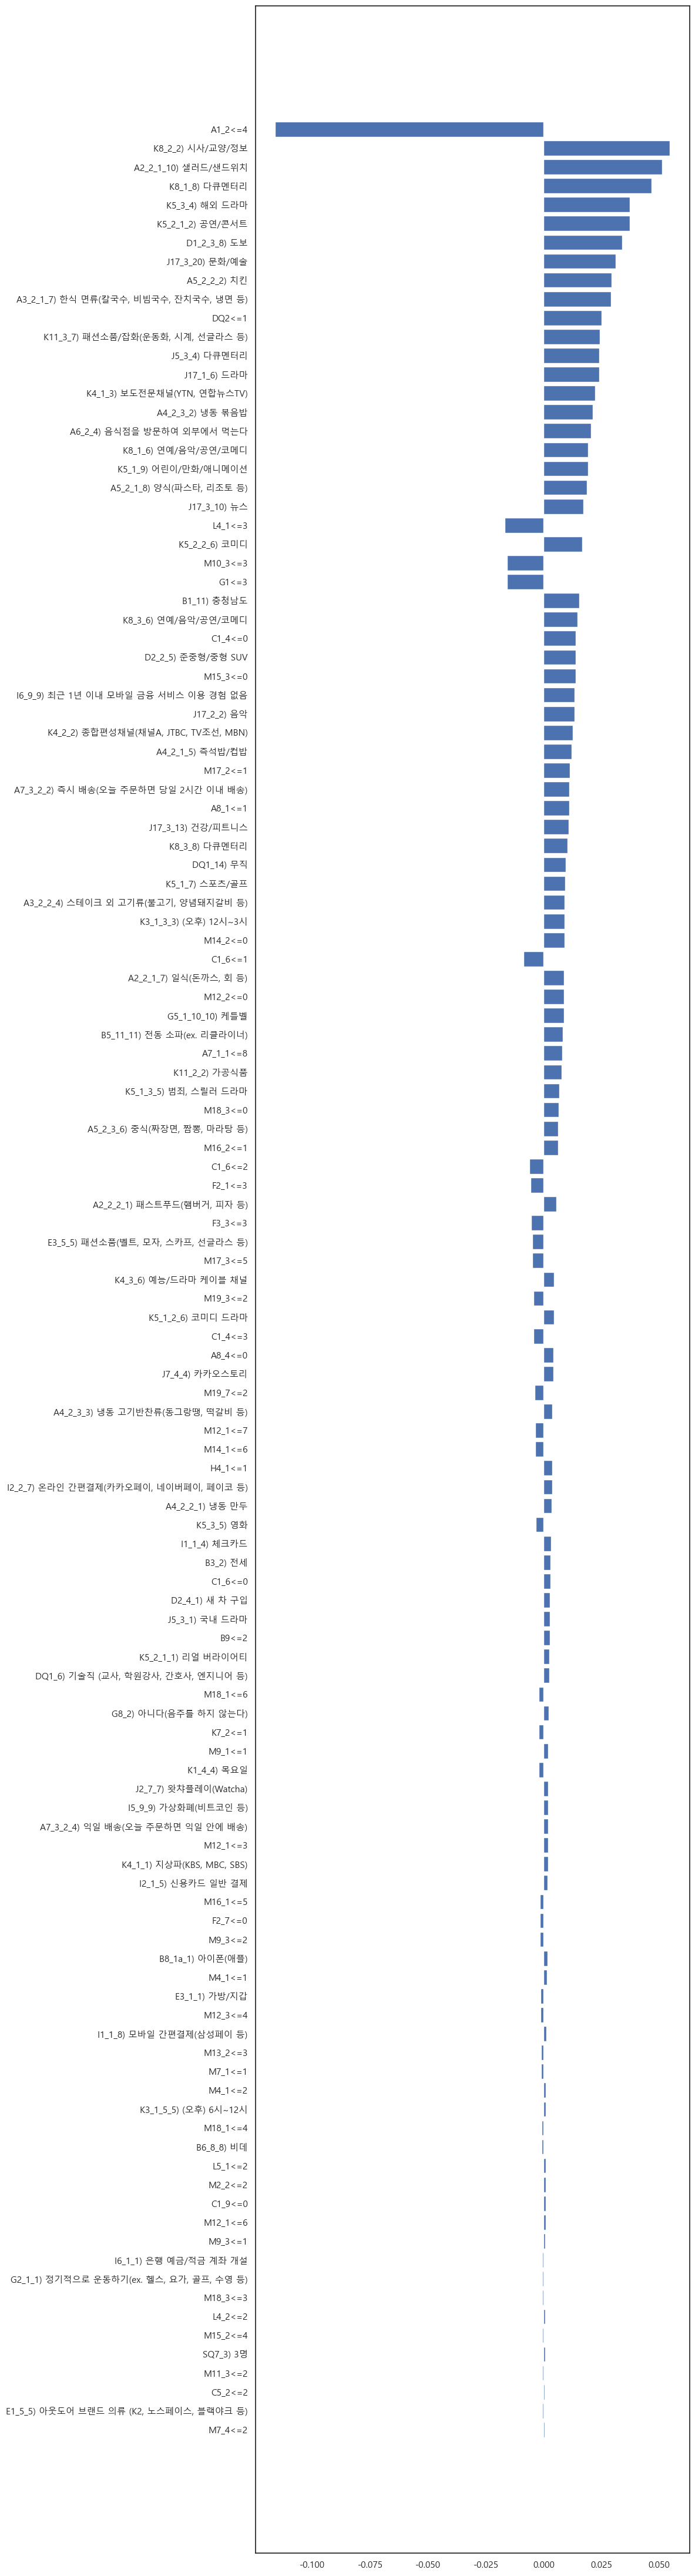

In [5]:
for i in [5]:
    model = DecisionTree(survey, embedding)
    model.kmeans_target(i)
    model.get_proper_param(search_space=range(1,30), check_param='min_samples_leaf', target_score=0.5, scoring='precision')

    feature_importance = profiler.dt_feature_importance_raw(model, ordinal_cols)
    profiler.plot_feature_importance(feature_importance)